In [ ]:
import random
import csv
import copy
import matplotlib.pyplot as plt

In [ ]:
#성적 저장용 클래스
class score():
  #score(학년,반수)로 새 클래스 작성
  def __init__(self,학년,반수):
    self.str_grade="{}학년".format(학년)
    self.grade = [self.str_grade]
    for i in range(1,반수+1): #0부터 시작하는거 보정
      x="{}학년 {}반".format(학년,i)
      self.grade.append([x])
    self.results=[]
  
  def 학년성적입력(self,학년성적목록):
    try:
      self.grade=학년성적목록
    except ValueError:
      print("지정된 형태의 데이터가 아닙니다.")

  #성적 입력/수정함수
  #성적목록은 ["i학년 j반", ["1번",{"국어":70,"수학":60,"영어":80,"과학":40}], ...., ["k번",{"국어":50,"수학":30,"영어":60,"과학":50}]] 꼴로 가정
  #수정 성적 목록은 ["i학년 j반", [{"학생정보":i학년j반k번","국어":70,"수학":60,"영어":80,"과학":40}], ...., [{"학생정보":i학년j반k번","국어":50,"수학":30,"영어":60,"과학":50}]]로 가정
  def 반별성적입력(self,반번호,반성적목록):
    try:
      self.grade[반번호]=반성적목록
    except ValueError:
      print("지정된 형태의 데이터가 아닙니다.")


  #성적은 {"국어":70,"수학":60,"영어":80,"과학":40}꼴로 가정
  def 학생별성적입력(self,반번호,학생번호,성적):
    try:
      sl={"학생정보":"{}{}반{}번".format(self.str_grade,반번호,학생번호)}
      sl.update(성적)
      self.grade[반번호].insert(학생번호,sl)
    except ValueError:
      print("지정된 형태의 데이터가 아닙니다.")

  def csv저장(self):
    try:
      f = open("{}.csv".format(self.grade[0]), mode = 'w', encoding = 'utf-8-sig')
      w = csv.writer(f)
      t= self.grade
      #학년에서 가장 학생이 많은 반을 찾아서 그거 기준으로 태그 입력
      max_student=0
      for j in range(1,len(t)):
        if len(t[j]) > max_student:
          max_student=len(t[j])
      tags=["구분"]
      for n in range(1,max_student):
        tags.append("{}번".format(n))
      print(tags) #tag정상 생성 확인용
      w.writerow(tags)
      for j in range(1,len(t)):
        w.writerow(t[j])
      print("{}.csv파일에 저장하였습니다.".format(self.grade[0]))
    except:
      print("{}.csv파일에 저장하지 못했습니다.".format(self.grade[0]))


  def csv열기(self,fn): #문제점 발견, 학생의 자료를 저장하고 불러올때 [str,{}]꼴이 유지된게 아니라 통째 str로 인식 ->해동함수로 해결
    slist=[]
    f=open("{}.csv".format(fn),mode='r',encoding='utf-8-sig')
    w=csv.reader(f)
    slist.extend(w)
    slist[0]=fn
    self.grade=slist
    for j in range(1,len(self.grade)): #j반
      t=self.grade[j]
      for k in range(1,len(t)): #k번
        t[k]=self.학생성적해동(t[k])
    print(self.grade)
    print("{}.csv파일을 여는데 성공했습니다.".format(fn))

  #{"학생정보":'6학년1반1번','국어': 42, '영어': 34, '수학': 53, '과학': 87}모양의 string을 원래대로 리스트와 딕셔너리로 변환하는 새로운 함수 필요
  #위 역할을 하는 해동함수만들어 보완
  def 학생성적해동(self,학생데이터):
    temp_list=학생데이터.split(',')
    for i in range(len(temp_list)):
      temp_list[i]=temp_list[i].replace("{","").replace("}","").replace("'","").replace(" ","") #연속작업을 이렇게도 처리 가능
    D={}
    for X in temp_list:
      if ':' in X:
        T=X.split(':')
        #print(T) #정상작동 확인용
        D[T[0]]=T[1]
    D['국어']=int(D['국어'])
    D['영어']=int(D['영어'])
    D['수학']=int(D['수학'])
    D['과학']=int(D['과학'])
    return D

In [ ]:
#성적 클래스를 상속받은 성적 처리용 클래스
class score_analysis(score):
  def __init__(self,학년=1,반수=1):
    super().__init__(학년,반수)
    #self.grade=[] #학년별 성적이 들어있는 데이터, score를 상속받아서 따로 선언해줄필요 없음
    self.results=[]
    #점수 기준 설정
    self.A=90
    self.B=80
    self.C=70
    #self.D=60 D기준은 없어도 될듯, A기준이상 A, B기준 이상 B, C기준 이상 C, 그 미만 D

  #csv열기 메소드 오버라이딩이 이상하게 안됨 그래서 아래 함수 따로 만들어서 실행시켜줘야 results리스트가 제대로 생성됨
  def 성적처리시작(self):
    self.results=copy.deepcopy(self.grade)
    self.results[0]={"학년":self.results[0]}
    for j in range(1,len(self.results)):
     self.results[j][0]={"반":self.results[j][0]}
    print("성적처리 준비가 완료되었습니다.")

  #하나로 합칠수 있을거 같긴한데 아래보다 길어질거 같음
  def A기준바꾸기(self,n):
    self.A=n
  def B기준바꾸기(self,n):
    self.B=n
  def C기준바꾸기(self,n):
    self.C=n

  def 등급판정(self,점수):
    if 점수 >= self.A:
      return 'A'
    elif 점수 >= self.B:
      return 'B'
    elif 점수 >= self.C:
      return 'C'
    elif 점수 < self.C:
      return 'D'
    else:
      print("잘못된 값입니다.")
      return 'err'

  def 등급부여(self):
    for j in range(1,len(self.grade)):
      t=self.grade[j] #j반
      for k in range(1,len(t)):
        tt=t[k]    
        self.results[j][k].update({"국어":self.등급판정(int(tt["국어"])),"영어":self.등급판정(int(tt["영어"])),"수학":self.등급판정(int(tt["수학"])),"과학":self.등급판정(int(tt["과학"]))})
        
  def 학생총점평균계산(self):
      for j in range(1,len(self.grade)):
        t=self.grade[j] #j반
        for k in range(1,len(t)):
          tt=t[k]
          total=int(tt["국어"])+int(tt["영어"])+int(tt["수학"])+int(tt["과학"])
          mean=total/4
          self.results[j][k]["총점평균"]=mean
      return mean

  def 과목별반평균계산(self,과목명,반번호):
      self.학생총점평균계산()
      if 과목명=="총점평균":
        t=self.results[반번호]
      else:
        t=self.grade[반번호]
      학년평균=0
      반평균=0
      for k in range(1,len(t)):
        반평균 += int(t[k][과목명])
      반평균 = 반평균/(len(t)-1) #인덱스 0은 숫자에서 제외
      self.results[반번호][0]["{}_반평균".format(과목명)]=반평균
      return 반평균

  def 과목별학년평균계산(self,과목명):
    t=self.results
    학년평균=0
    for j in range(1,len(t)):
      self.과목별반평균계산(과목명,j)
      학년평균 += t[j][0]["{}_반평균".format(과목명)]
    학년평균 = 학년평균 / (len(t)-1)  #인덱스 0은 숫자에서 제외
    self.results[0]["{}_학년평균".format(과목명)]=학년평균
    return 학년평균

  def 전체학년평균계산(self):
    과목=["국어","영어","수학","과학","총점평균"]
    for x in 과목:
      self.과목별학년평균계산(x)

  def 과목별반분산표준편차계산(self,과목명,반번호):
    반분산=0
    t=self.results[반번호]
    if t[0]["{}_반평균".format(과목명)]>0:
      반평균=t[0]["{}_반평균".format(과목명)]
    else:
      반평균=self.과목별반평균계산(과목명,반번호)
    for k in range(1,len(t)):
      반분산 += (t[k][과목명]-반평균)**2
    반분산 = 반분산/(len(t)-1)
    반표준편차 = 반분산 ** 0.5
    t[0]["{}_반분산".format(과목명)]=반분산
    t[0]["{}_반표준편차".format(과목명)]=반표준편차
    return 반분산, 반표준편차

  def 과목별학년분산표준편차계산(self,과목명):
    if self.results[0]["{}_학년평균".format(과목명)]>0:
      학년평균=self.results[0]["{}_학년평균".format(과목명)]
    else:
      반평균=self.과목별학년평균계산(과목명)
    학년분산=0
    학생수=0
    for j in range(1,len(self.results)):
      if 과목명=="총점평균":
        t=self.results[j] #j반의 데이터
      else:
        t=self.grade[j]
      학생수 += len(t)-1 #j반의 학생수를 더함
      for k in range(1,len(t)):
        학년분산 += (t[k][과목명]-학년평균)**2
    학년분산= 학년분산 / 학생수
    학년표준편차 = 학년분산 ** 0.5
    self.results[0]["{}_학년분산".format(과목명)]=학년분산
    self.results[0]["{}_학년표준편차".format(과목명)]=학년표준편차
    return 학년분산, 학년표준편차

  def 전체학년분산표준편차계산(self):
    과목=["국어","영어","수학","과학","총점평균"]
    for x in 과목:
      self.과목별학년분산표준편차계산(x)

  def 과목별반누적분포빈도계산(self,과목명,반번호):
    과목d={}
    반빈도={}
    점수s=set()
    if 과목명 =="총점평균":
      t=self.results[반번호]
    else: 
      t=self.grade[반번호]
    for k in range(1,len(t)):
      점수s.add(t[k][과목명])
    점수s=list(점수s)
    td=dict.fromkeys(점수s,0)
    과목d.update(td)
    반빈도.update(td)
    #print(과목d) #작동 확인용
    for k in range(1,len(t)):
      _str=t[k][과목명]
      과목d[_str]=과목d[_str]+1
      반빈도[_str]=과목d[_str]+1
    self.results[반번호][0]["{}_반누적분포".format(과목명)]=과목d
    for x in td:
      반빈도[x]=반빈도[x]/(len(t)-1)
    self.results[반번호][0]["{}_반빈도".format(과목명)]=반빈도
    #print(self.results[반번호][0]) #작동 확인용
    return 과목d, 반빈도

  def 통합반누적분포빈도계산(self,반번호):
      과목=["국어","영어","수학","과학","총점평균"]
      for x in 과목:
        self.과목별반누적분포빈도계산(x,반번호)
      #print("{}반의 누적분포와 빈도가 계산되었습니다.".format(반번호)) #작동확인용

  def 학년과목별누적분포빈도계산(self,과목명):
    t=self.results
    키값=[]
    누적분포={}
    빈도={}
    학생수=0
    for j in range(1,len(t)):
      키값.extend((t[j][0]["{}_반누적분포".format(과목명)]).keys())
      학생수=학생수+(len(t[j])-1)
    키값=set(키값)
    키값=list(키값)
    임시d=dict.fromkeys(키값,0)
    for x in 키값:
      for j in range(1,len(t)):
        if type(t[j][0]["{}_반누적분포".format(과목명)].get(x))==int: #get을 사용해야 에러발생 피할수있음
          임시d[x] = 임시d[x]+1
    #print(임시d) #작동 확인용
    t[0]["{}_학년누적분포".format(과목명)]=임시d
    빈도=copy.deepcopy(임시d)
    for x in 키값:
      빈도[x]=빈도[x]/학생수
    #print(빈도) #작동 확인용
    t[0]["{}_학년빈도".format(과목명)]=빈도
    return 임시d, 빈도

  def 전체학년누적분포빈도계산(self):
    t=self.results
    for j in range(1,len(t)):
     self.통합반누적분포빈도계산(j)
    과목=["국어","영어","수학","과학","총점평균"]
    for x in 과목:
      self.학년과목별누적분포빈도계산(x)

  def 결과csv저장(self):
    try:
      f = open("{}의 결과물.csv".format(self.grade[0]), mode = 'w', encoding = 'utf-8-sig')
      w = csv.writer(f)
      t= self.results
      #학년에서 가장 학생이 많은 반을 찾아서 그거 기준으로 태그 입력
      max_student=0
      for j in range(1,len(t)):
        if len(t[j]) > max_student:
          max_student=len(t[j])
      tags=[t[0]]
      for n in range(1,max_student):
        tags.append("{}번".format(n))
      print(tags) #tag정상 생성 확인용
      w.writerow(tags)
      for j in range(1,len(t)):
        w.writerow(t[j])
      print("{}의 결과물.csv파일에 저장하였습니다.".format(self.grade[0]))
    except:
      print("{}의 결과물.csv파일에 저장하지 못했습니다.".format(self.grade[0]))


  #전체를 입력하면 학년전체, 반숫자를 입력하면 그반만 대상으로 목표를 그래프화
  #과목: 국어, 영어, 수학, 과학, 총점평균
  #목표
  #전체:  과목_학년누적분포, 과목_학년빈도
  #반: 과목_반누적분포, 과목_학년빈도
  def 그래프(self,목표,대상="전체"): #디폴트값설정
    if 대상=="전체":
      t=self.results
      name=t[0]["학년"]
    else:
      t=self.results[대상]
      name=t[0]["반"]
    _data=t[0][목표]
    print("{}의 {} 그래프".format(name,목표))
    x=list(_data.keys())
    y=list(_data.values())
    plt.plot(x,y,'ro')
    plt.show()

  #과목_반평균, 과목_반분산, 과목_반표준편차, 과목_학년평균, 과목_학년분산, 과목_학년표준편차는 표로 시각화
  def 테이블(self, 대상):
    fig, ax =plt.subplots(1,1)
    과목=['국어','영어','수학','과학','총점평균']
    row_labels=["Korean","English","Math","Science","Total_mean"]
    data=[]
    if 대상=="전체":
      t=self.results[0]
      name=t["학년"]
      col_labels=['g_Mean','g_Var','g_SD']
      for x in 과목:
        _td=[t["{}_학년평균".format(x)],t["{}_학년분산".format(x)],t["{}_학년표준편차".format(x)]]
        data.append(_td)
    else:
      t=self.results[대상][0]
      name=t["반"]
      col_labels=['c_Mean','c_Var','c_SD']
      for x in 과목:
        _td=[t["{}_반평균".format(x)],t["{}_반분산".format(x)],t["{}_반표준편차".format(x)]]
        data.append(_td)
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=data,colLabels=col_labels,rowLabels=row_labels,loc="center")
    #print(data) #data 맞게 들어갔는지 확인용
    plt.show() #matplotlib table 라벨에는 한글을 바로 쓸 수 없음
    
    

In [ ]:
#작업 테스트용
#1~6학년 각각 랜덤하게 클래스만들고 랜덤한 학생들에게 랜덤으로 성적 채워넣기
min_class=3
max_class=10
min_stu=15
max_stu=30
min_score=30
max_score=100
for i in range(1,7): #i 학년
  globals()["학년{}".format(i)]=score(i,random.randint(min_class,max_class)) #반수 설정
  t=vars()["학년{}".format(i)]
  for j in range(1,len(t.grade)): #j 반
    for k in range(1,random.randint(min_stu,max_stu)): #k번
      st_score={"국어":random.randint(min_score,max_score),"영어":random.randint(min_score,max_score),"수학":random.randint(min_score,max_score),"과학":random.randint(min_score,max_score)}
      t.학생별성적입력(j,k,st_score)
  #print(t.grade) #작동 확인용

#각 학년별로 csv파일 따로 만들어서 저장
for i in range(1,7):
  t=vars()["학년{}".format(i)]
  print(t.grade)
  t.csv저장()
total=["학교",학년1.grade,학년2.grade,학년3.grade,학년4.grade,학년5.grade,학년6.grade]
print(total) #total[학년][반][번호]로 어떤 학생이든 접근 가능 total[학년][반][번호][1]["수학"]
print(total[2][3][1]) #학생 번호
print(total[2][3][1]["수학"]) #학생성적


['1학년', ['1학년 1반', {'학생정보': '1학년1반1번', '국어': 64, '영어': 73, '수학': 79, '과학': 72}, {'학생정보': '1학년1반2번', '국어': 80, '영어': 85, '수학': 74, '과학': 51}, {'학생정보': '1학년1반3번', '국어': 56, '영어': 37, '수학': 94, '과학': 44}, {'학생정보': '1학년1반4번', '국어': 41, '영어': 57, '수학': 36, '과학': 87}, {'학생정보': '1학년1반5번', '국어': 77, '영어': 58, '수학': 56, '과학': 99}, {'학생정보': '1학년1반6번', '국어': 82, '영어': 78, '수학': 33, '과학': 71}, {'학생정보': '1학년1반7번', '국어': 52, '영어': 92, '수학': 68, '과학': 67}, {'학생정보': '1학년1반8번', '국어': 71, '영어': 64, '수학': 55, '과학': 79}, {'학생정보': '1학년1반9번', '국어': 86, '영어': 55, '수학': 97, '과학': 74}, {'학생정보': '1학년1반10번', '국어': 41, '영어': 94, '수학': 31, '과학': 61}, {'학생정보': '1학년1반11번', '국어': 73, '영어': 68, '수학': 39, '과학': 58}, {'학생정보': '1학년1반12번', '국어': 80, '영어': 68, '수학': 93, '과학': 93}, {'학생정보': '1학년1반13번', '국어': 90, '영어': 74, '수학': 59, '과학': 74}, {'학생정보': '1학년1반14번', '국어': 87, '영어': 31, '수학': 62, '과학': 58}], ['1학년 2반', {'학생정보': '1학년2반1번', '국어': 65, '영어': 35, '수학': 45, '과학': 57}, {'학생정보': '1학년2반2번', '국어': 39, '영어': 97, '수학': 78,

['1학년', ['1학년 1반', {'학생정보': '1학년1반1번', '국어': 64, '영어': 73, '수학': 79, '과학': 72}, {'학생정보': '1학년1반2번', '국어': 80, '영어': 85, '수학': 74, '과학': 51}, {'학생정보': '1학년1반3번', '국어': 56, '영어': 37, '수학': 94, '과학': 44}, {'학생정보': '1학년1반4번', '국어': 41, '영어': 57, '수학': 36, '과학': 87}, {'학생정보': '1학년1반5번', '국어': 77, '영어': 58, '수학': 56, '과학': 99}, {'학생정보': '1학년1반6번', '국어': 82, '영어': 78, '수학': 33, '과학': 71}, {'학생정보': '1학년1반7번', '국어': 52, '영어': 92, '수학': 68, '과학': 67}, {'학생정보': '1학년1반8번', '국어': 71, '영어': 64, '수학': 55, '과학': 79}, {'학생정보': '1학년1반9번', '국어': 86, '영어': 55, '수학': 97, '과학': 74}, {'학생정보': '1학년1반10번', '국어': 41, '영어': 94, '수학': 31, '과학': 61}, {'학생정보': '1학년1반11번', '국어': 73, '영어': 68, '수학': 39, '과학': 58}, {'학생정보': '1학년1반12번', '국어': 80, '영어': 68, '수학': 93, '과학': 93}, {'학생정보': '1학년1반13번', '국어': 90, '영어': 74, '수학': 59, '과학': 74}, {'학생정보': '1학년1반14번', '국어': 87, '영어': 31, '수학': 62, '과학': 58}], ['1학년 2반', {'학생정보': '1학년2반1번', '국어': 65, '영어': 35, '수학': 45, '과학': 57}, {'학생정보': '1학년2반2번', '국어': 39, '영어': 97, '수학': 78,

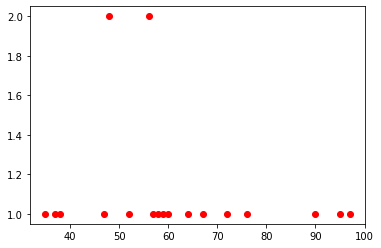

1학년의 영어_학년누적분포 그래프


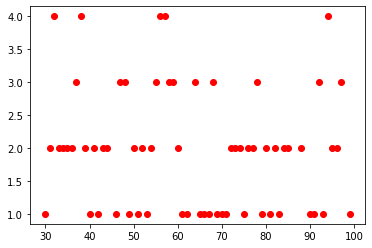

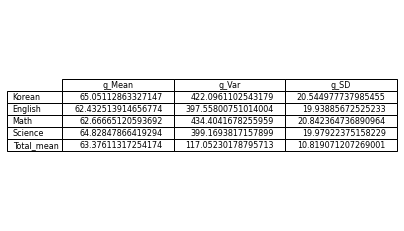

In [ ]:
#함수 구현 확인용
학년x=score_analysis()
학년x.csv열기("1학년")
print(학년x.grade)
학년x.성적처리시작()
print(학년x.results)
print(학년x.등급판정(80))
학년x.등급부여()
print(학년x.results)
학년x.전체학년평균계산()
print(학년x.results)
학년x.전체학년분산표준편차계산()
print(학년x.results)
학년x.전체학년누적분포빈도계산()
print(학년x.results)
학년x.결과csv저장()
학년x.그래프("영어_반누적분포",2)
학년x.그래프("영어_학년누적분포")
학년x.테이블("전체")

In [ ]:
#구동부용 함수
#입력확인 함수 입력은 input으로 입력된 str, 입력범위는 ["1","2","3","4","5","6"]식으로 정리된 리스트
def 입력확인(입력,입력범위):
  if 입력.isdigit()==True: #str의 메서드 str.isdigit()으로 쓰며 str이 정수형태이면 true를 반환
    if 입력 in 입력범위:
      return True
    else:
      print("범위를 벗어났습니다.")
      return False
  else:
    print("정수가 아닙니다.")
    return False

def 학년데이터확인(학년):
  print("확인중")
  학년범위=["1","2","3","4","5","6"]
  if 입력확인(학년,학년범위)==True:
    if globals()['학년{}'.format(학년)].grade[0] == "{}학년".format(학년):
      #print("확인1") #분기확인용
      print("-----------------------------------------------")
      print("{}학년의 데이터에 접근하였습니다".format(학년))
      print("-----------------------------------------------")
      print(globals()['학년{}'.format(학년)].grade)
      print("-----------------------------------------------")
      return True
    else:
      #print("확인2") #분기확인용
      print("{}학년의 데이터가 없습니다.".format(학년))
      print("{}학년의 데이터를 생성하겠습니다.".format(학년))
      반수=int(input("{}학년은 몇개 반입니까? :".format(학년)))
      globals()['학년{}'.format(학년)]= score_analysis(학년,반수)
      print("총{}개반을 가진 {}학년의 데이터를 생성하였습니다.".format(반수,학년))
      t=globals()['학년{}'.format(학년)]
      print(t.grade)
      return True
  else:
    #print("확인3") #분기확인용
    print("학년값이 잘못입력되었습니다. 학년은 1에서 6학년까지 있습니다.")
    return False          
 


In [ ]:
#입력받는 형식이 str이라서 이걸 해동할 필요가 있음
#[] {}을 기준삼아서 하면 될거도 같은데 작업시간 엄청 길게 걸릴듯
데이터="['1학년', ['1학년 1반', {'학생정보': '1학년1반1번', '국어': 64, '영어': 73, '수학': 79, '과학': 72}, {'학생정보': '1학년1반2번', '국어': 80, '영어': 85, '수학': 74, '과학': 51}, {'학생정보': '1학년1반3번', '국어': 56, '영어': 37, '수학': 94, '과학': 44}, {'학생정보': '1학년1반4번', '국어': 41, '영어': 57, '수학': 36, '과학': 87}], ['1학년 2반', {'학생정보': '1학년2반1번', '국어': 65, '영어': 35, '수학': 45, '과학': 57}, {'학생정보': '1학년2반2번', '국어': 39, '영어': 97, '수학': 78, '과학': 62}, {'학생정보': '1학년2반3번', '국어': 32, '영어': 64, '수학': 63, '과학': 49}, {'학생정보': '1학년2반4번', '국어': 60, '영어': 57, '수학': 77, '과학': 46}, {'학생정보': '1학년2반5번', '국어': 38, '영어': 60, '수학': 32, '과학': 30}, {'학생정보': '1학년2반6번', '국어': 83, '영어': 90, '수학': 89, '과학': 71}]"
d_lst=데이터.replace("'","")
d_lst=데이터.split(",")
print(d_lst)
print(d_lst[0])
print(d_lst[1])

["['1학년'", " ['1학년 1반'", " {'학생정보': '1학년1반1번'", " '국어': 64", " '영어': 73", " '수학': 79", " '과학': 72}", " {'학생정보': '1학년1반2번'", " '국어': 80", " '영어': 85", " '수학': 74", " '과학': 51}", " {'학생정보': '1학년1반3번'", " '국어': 56", " '영어': 37", " '수학': 94", " '과학': 44}", " {'학생정보': '1학년1반4번'", " '국어': 41", " '영어': 57", " '수학': 36", " '과학': 87}]", " ['1학년 2반'", " {'학생정보': '1학년2반1번'", " '국어': 65", " '영어': 35", " '수학': 45", " '과학': 57}", " {'학생정보': '1학년2반2번'", " '국어': 39", " '영어': 97", " '수학': 78", " '과학': 62}", " {'학생정보': '1학년2반3번'", " '국어': 32", " '영어': 64", " '수학': 63", " '과학': 49}", " {'학생정보': '1학년2반4번'", " '국어': 60", " '영어': 57", " '수학': 77", " '과학': 46}", " {'학생정보': '1학년2반5번'", " '국어': 38", " '영어': 60", " '수학': 32", " '과학': 30}", " {'학생정보': '1학년2반6번'", " '국어': 83", " '영어': 90", " '수학': 89", " '과학': 71}]"]
['1학년'
 ['1학년 1반'


In [ ]:
#구동부용 함수 테스트용
print(입력확인("1",["1","2","3","4"]))
#학년데이터확인("1")
#학년데이터확인("ㅇㅇ")
데이터="['1학년', ['1학년 1반', {'학생정보': '1학년1반1번', '국어': 64, '영어': 73, '수학': 79, '과학': 72}, {'학생정보': '1학년1반2번', '국어': 80, '영어': 85, '수학': 74, '과학': 51}, {'학생정보': '1학년1반3번', '국어': 56, '영어': 37, '수학': 94, '과학': 44}, {'학생정보': '1학년1반4번', '국어': 41, '영어': 57, '수학': 36, '과학': 87}], ['1학년 2반', {'학생정보': '1학년2반1번', '국어': 65, '영어': 35, '수학': 45, '과학': 57}, {'학생정보': '1학년2반2번', '국어': 39, '영어': 97, '수학': 78, '과학': 62}, {'학생정보': '1학년2반3번', '국어': 32, '영어': 64, '수학': 63, '과학': 49}, {'학생정보': '1학년2반4번', '국어': 60, '영어': 57, '수학': 77, '과학': 46}, {'학생정보': '1학년2반5번', '국어': 38, '영어': 60, '수학': 32, '과학': 30}, {'학생정보': '1학년2반6번', '국어': 83, '영어': 90, '수학': 89, '과학': 71}]"
학년1.학년성적입력(데이터)
print(학년1.grade)
print(type(학년1.grade))
print(type(학년1.grade[1]))
print(학년1.grade[1])

True
['[', "'", '1', '학', '년', "'", ',', ' ', '[', "'", '1', '학', '년', ' ', '1', '반', "'", ',', ' ', '{', "'", '학', '생', '정', '보', "'", ':', ' ', "'", '1', '학', '년', '1', '반', '1', '번', "'", ',', ' ', "'", '국', '어', "'", ':', ' ', '6', '4', ',', ' ', "'", '영', '어', "'", ':', ' ', '7', '3', ',', ' ', "'", '수', '학', "'", ':', ' ', '7', '9', ',', ' ', "'", '과', '학', "'", ':', ' ', '7', '2', '}', ',', ' ', '{', "'", '학', '생', '정', '보', "'", ':', ' ', "'", '1', '학', '년', '1', '반', '2', '번', "'", ',', ' ', "'", '국', '어', "'", ':', ' ', '8', '0', ',', ' ', "'", '영', '어', "'", ':', ' ', '8', '5', ',', ' ', "'", '수', '학', "'", ':', ' ', '7', '4', ',', ' ', "'", '과', '학', "'", ':', ' ', '5', '1', '}', ',', ' ', '{', "'", '학', '생', '정', '보', "'", ':', ' ', "'", '1', '학', '년', '1', '반', '3', '번', "'", ',', ' ', "'", '국', '어', "'", ':', ' ', '5', '6', ',', ' ', "'", '영', '어', "'", ':', ' ', '3', '7', ',', ' ', "'", '수', '학', "'", ':', ' ', '9', '4', ',', ' ', "'", '과', '학', "'", ':', ' ', '4', '4',

-----------------------------------------------
---------정수초등학교 성적관리 프로그램----------
-----------------------------------------------
실행할 작업을 선택하세요.
1.성적입력/수정
2.성적분석
9.전체학년 성적 무작위 생성, csv로 저장
0.종료
입력: 9
-----------------------------------------------
각 학년의 반은 3에서6사이, 학생수는 5에서 10사이, 학생의 각 과목별 성적은 30에서 100까지로 무작위 생성됩니다.
['1학년', ['1학년 1반', {'학생정보': '1학년1반1번', '국어': 95, '영어': 46, '수학': 63, '과학': 96}, {'학생정보': '1학년1반2번', '국어': 34, '영어': 61, '수학': 97, '과학': 42}, {'학생정보': '1학년1반3번', '국어': 31, '영어': 62, '수학': 33, '과학': 44}, {'학생정보': '1학년1반4번', '국어': 83, '영어': 49, '수학': 40, '과학': 30}, {'학생정보': '1학년1반5번', '국어': 53, '영어': 94, '수학': 74, '과학': 38}], ['1학년 2반', {'학생정보': '1학년2반1번', '국어': 87, '영어': 65, '수학': 60, '과학': 67}, {'학생정보': '1학년2반2번', '국어': 47, '영어': 90, '수학': 58, '과학': 30}, {'학생정보': '1학년2반3번', '국어': 70, '영어': 50, '수학': 60, '과학': 58}, {'학생정보': '1학년2반4번', '국어': 88, '영어': 87, '수학': 74, '과학': 100}, {'학생정보': '1학년2반5번', '국어': 69, '영어': 43, '수학': 98, '과학': 77}, {'학생정보': '1학년2반6번', '국어': 50, '영어': 95, 

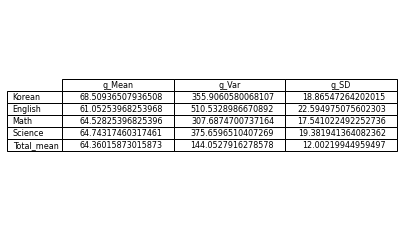

-----------------------------------------------
4학년 성적분석
1.전체 등급부여
2.전체 평균 계산
3.전체 분산, 표준편차 계산
4.전체 누적분포, 빈도 계산
5.모두 계산
6.테이블 - 평균,분산,표준편차
7.그래프 - 누적분포, 빈도
9.분석결과 csv저장
0.초기화면으로
어떤 작업을 하시겠습니까?7
-----------------------------------------------
국어,영어,수학,과학,총점평균의 누적분포와 빈도를 그래프로 출력합니다.
4학년의 국어_학년누적분포 그래프


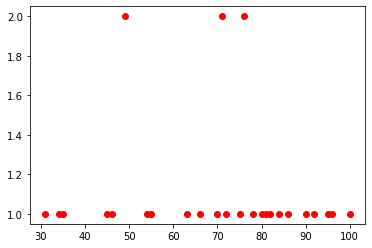

4학년의 국어_학년빈도 그래프


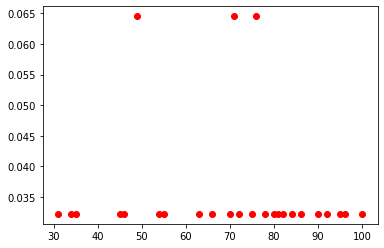

4학년의 영어_학년누적분포 그래프


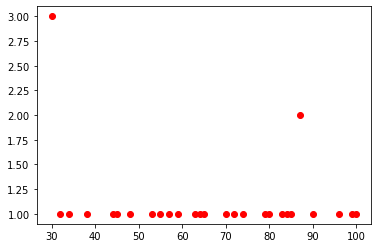

4학년의 영어_학년빈도 그래프


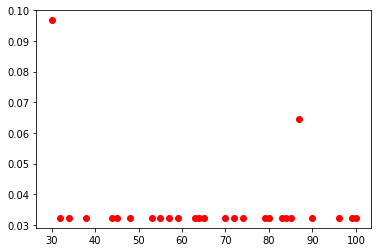

4학년의 수학_학년누적분포 그래프


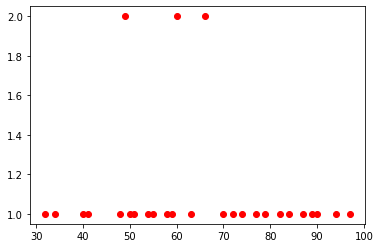

4학년의 수학_학년빈도 그래프


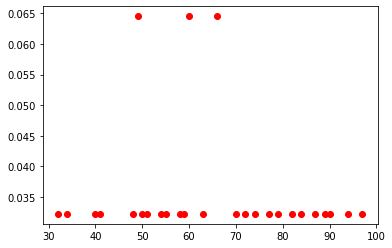

4학년의 과학_학년누적분포 그래프


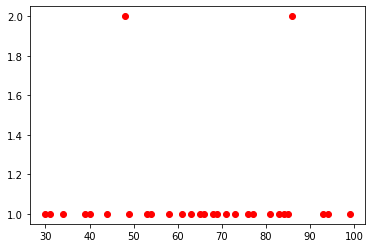

4학년의 과학_학년빈도 그래프


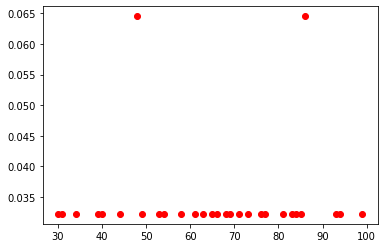

4학년의 총점평균_학년누적분포 그래프


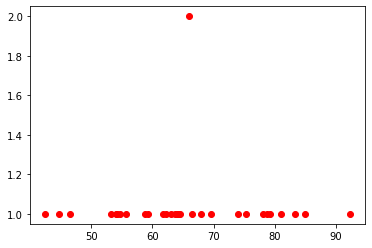

4학년의 총점평균_학년빈도 그래프


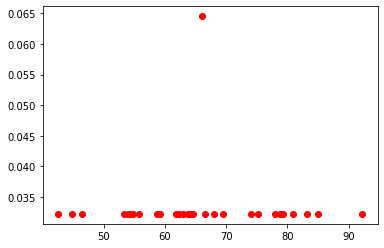

-----------------------------------------------
4학년 성적분석
1.전체 등급부여
2.전체 평균 계산
3.전체 분산, 표준편차 계산
4.전체 누적분포, 빈도 계산
5.모두 계산
6.테이블 - 평균,분산,표준편차
7.그래프 - 누적분포, 빈도
9.분석결과 csv저장
0.초기화면으로
어떤 작업을 하시겠습니까?0
-----------------------------------------------
초기화면으로 돌아갑니다.
실행할 작업을 선택하세요.
1.성적입력/수정
2.성적분석
9.전체학년 성적 무작위 생성, csv로 저장
0.종료
입력: 0
-----------------------------------------------


In [ ]:
#구동부
#  학년별 성적 입력/수정, 반별 성적 입력/수정은 list형태로 작동하는 함수는 있으나 
#입력받은 str을 이중배열,삼중배열로 되돌리는 함수 작업중이어서 넣지못함
print("-----------------------------------------------")
print("---------정수초등학교 성적관리 프로그램----------")
print("-----------------------------------------------")
while True:
  print("실행할 작업을 선택하세요.")
  print("1.성적입력/수정")
  print("2.성적분석")
  print("9.전체학년 성적 무작위 생성, csv로 저장")
  print("0.종료")
  ip_work0=input("입력: ")
  print("-----------------------------------------------")
  #1.성적입력/수정
  if ip_work0=="1": 
    while True:
      ip_학년=input("몇학년의 성적을 입력/수정합니까? :")
      if 학년데이터확인(ip_학년)==True:
        break;
      else:
        print("다시 학년을 입력해주세요.")
        continue

    while True:
      print("-----------------------------------------------")
      print("{}학년 성적입력/수정--실행할 작업을 선택하세요.".format(ip_학년))
      print("1.학년별 성적 데이터 불러오기")
      print("2.학생별 성적 입력/수정") 
      print("3.{}학년 성적 데이터 csv저장".format(ip_학년))      
      print("0.초기화면으로")
      ip_work1=input("입력 : ")
      print("-----------------------------------------------")
      #1.학년별 성적 데이터 불러오기
      if ip_work1=="1": 
        ip_파일명=input("불러올 파일이름을 입력해주세요")
        try:
          globals()['학년{}'.format(ip_학년)].csv열기(ip_파일명)
          print("파일 {}에서 {}학년의 데이터를 가져왔습니다.".format(ip_파일명,ip_학년))
        except:
          print("파일 {}을 열때 에러가 발생하였습니다.".format(ip_파일명))

      #2.학생별 성적 입력/수정
      elif ip_work1=="2": 
        _tdata=globals()["학년{}".format(ip_학년)]
        print(_tdata.grade)
        print("성적을 입력/수정할 학생의 반과 번호를 알려주세요.")
        ip_반=int(input("몇반 :"))
        ip_번호=int(input("몇번 :"))
        print("-----------------------------------------------")
        while True:
          ip_과목=input("어떤 과목의 성적을 입력/수정할까요?: ")
          print(_tdata.grade[ip_반][ip_번호][ip_과목])
          ip_점수=int(input("몇점으로 바꿀까요?: "))
          _tdata.grade[ip_반][ip_번호][ip_과목]=ip_점수
          print("{}의 점수를 {}로 바꾸었습니다.".format(ip_과목,ip_점수))
          print(_tdata.grade[ip_반][ip_번호])
          
          ip_분기=input("이 학생의 다른 과목의 성적도 입력/수정하시겠습니까? y/n : ")
          if ip_분기 =="y" or ip_분기 == "Y":
            print("{}학년 성적입력/수정창으로 돌아갑니다.".format(ip_학년))
            break;
          else:
            print("계속해서 입력/수정합니다.")
            continue;

      #3.{}학년 성적 데이터 csv저장".format(ip_학년)
      elif ip_work1=="3":
        try:
          globals()['학년{}'.format(ip_학년)].csv저장()
          print("{}학년.csv파일에 성적이 저장되었습니다.".format(ip_학년))
        except:
          print("csv파일로 저장하는걸 실패하였습니다.")

      elif ip_work1=="0":
        print("초기화면으로 돌아갑니다.")
        break

  #-----------------------------------------------------------------------------------------------------      
  # 2.성적분석
  elif ip_work0=="2":
      print("-----------------------------------------------")
      while True:
        ip_학년=input("몇학년의 성적을 분석합니까? :")
        print(ip_학년)
        if 학년데이터확인(ip_학년)==True:
          break;
        else:
          print("다시 학년을 입력해주세요.")
          continue

      t_data=globals()['학년{}'.format(ip_학년)]
      t_data.성적처리시작()
      t_data.학생총점평균계산()
      while True:
        #과목별 반별로 하는거도 가능하게 함수를 짜놨으나 작업량이 너무 늘어나서 전체학년 대상으로만 가능하게 변경
        print("-----------------------------------------------")
        print("{}학년 성적분석".format(ip_학년))
        print("1.전체 등급부여")
        print("2.전체 평균 계산")
        print("3.전체 분산, 표준편차 계산")
        print("4.전체 누적분포, 빈도 계산")
        print("5.모두 계산")
        print("6.테이블 - 평균,분산,표준편차")
        print("7.그래프 - 누적분포, 빈도")
        print("9.분석결과 csv저장")
        print("0.초기화면으로")
        ip_work2=input("어떤 작업을 하시겠습니까?")
        print("-----------------------------------------------")

        #1.전체 등급부여
        if ip_work2=="1":
          t_data.등급부여()
          print("{}학년 모든 학생의 모든 과목 등급부여가 완료되었습니다.".format(ip_학년))

        #2.전체 평균 계산
        elif ip_work2=="2":
          t_data.전체학년평균계산()
          print("{}학년 모든 학생의 모든 과목의 평균계산이 완료되었습니다.".format(ip_학년))

        #3.전체 분산, 표준편차 계산
        elif ip_work2=="3":
          print("평균의 계산이 안되어 있으면 자동으로 계산됩니다.")
          t_data.전체학년분산표준편차계산()
          print("{}학년 모든 학생의 모든 과목의 분산과 표준편차의 계산이 완료되었습니다.".format(ip_학년))

        #4.전체 누적분포, 빈도 계산
        elif ip_work2=="4":
          t_data.전체학년누적분포빈도계산()
          print("{}학년 모든 학생의 모든 과목의 누적분포와 빈도의 계산이 완료되었습니다.".format(ip_학년))

        #5.모두 계산
        elif ip_work2=="5":
          t_data.등급부여()
          print("{}학년 모든 학생의 모든 과목 등급부여가 완료되었습니다.".format(ip_학년))
          t_data.전체학년평균계산()
          print("{}학년 모든 학생의 모든 과목의 평균계산이 완료되었습니다.".format(ip_학년))
          t_data.전체학년분산표준편차계산()
          print("{}학년 모든 학생의 모든 과목의 분산과 표준편차의 계산이 완료되었습니다.".format(ip_학년))
          t_data.전체학년누적분포빈도계산()
          print("{}학년 모든 학생의 모든 과목의 누적분포와 빈도의 계산이 완료되었습니다.".format(ip_학년))

        #6.테이블 - 평균,분산,표준편차
        elif ip_work2=="6":
          print("{}학년의 국어,영어,수학,과학,총점평균의 평균,분산,표준편차를 테이블로 출력합니다.")
          t_data.테이블("전체")

        #7.그래프 - 누적분포, 빈도
        elif ip_work2=="7":
          print("국어,영어,수학,과학,총점평균의 누적분포와 빈도를 그래프로 출력합니다.")
          대상=["국어","영어","수학","과학","총점평균"]
          for lx in 대상:
            t_data.그래프("{}_학년누적분포".format(lx))
            t_data.그래프("{}_학년빈도".format(lx))
        #0. 초기화면으로
        elif ip_work2=="0":
          print("초기화면으로 돌아갑니다.")
          break
        #예외처리
        else:
          print("잘못입력하셨습니다.")
          continue
       
  #-----------------------------------------------------------------------------------------------------      
  elif ip_work0=="9": #전체 학년 성적 무작위 생성
    min_class=3
    max_class=6
    min_stu=5
    max_stu=10
    min_score=30
    max_score=100
    print("각 학년의 반은 {}에서{}사이, 학생수는 {}에서 {}사이, 학생의 각 과목별 성적은 {}에서 {}까지로 무작위 생성됩니다.".format(min_class,max_class,min_stu,max_stu,min_score,max_score))
    
    #완성후 여유되면 변수부분 바꿀수 있게 추가할 자리
    
    for i in range(1,7): #i 학년
      globals()["학년{}".format(i)]=score_analysis(i,random.randint(min_class,max_class)) #반수 설정
      t=vars()["학년{}".format(i)]
      for j in range(1,len(t.grade)): #j 반
        for k in range(1,random.randint(min_stu,max_stu)): #k번
          st_score={"국어":random.randint(min_score,max_score),"영어":random.randint(min_score,max_score),"수학":random.randint(min_score,max_score),"과학":random.randint(min_score,max_score)}
          t.학생별성적입력(j,k,st_score)
      #print(t.grade) #작동 확인용

    #각 학년별로 csv파일 따로 만들어서 저장
    for i in range(1,7):
      t=vars()["학년{}".format(i)]
      print(t.grade)
      t.csv저장()
    total=["학교",학년1.grade,학년2.grade,학년3.grade,학년4.grade,학년5.grade,학년6.grade]

  #0. 종료
  elif ip_work0=="0":
    break

  else: #1,2,9,0에만 반응하고 다른거는 else로 오게 예외처리
    print("잘못입력하였습니다.")
    print("다시 입력해 주세요.")
    continue